### EEC174AY Lab 2 ###


## Outline

1. Basics of Python Pandas for Reading & Manipulating Data
2. Introduction to Scikit-Learn (package used for more traditional machine learning tools), create an RF model
3. Comparison of Surpervised ML algorithms
4. Clustering, Unsupervised Learning

# Basics of Python Pandas for Reading & Manipulating Data

### Reading Data into Memory

In [ ]:
# make sure we can plot in future if we want
%matplotlib notebook
# make sure to ignore warnings
import warnings
warnings.simplefilter('ignore')
# Import statement for pandas
import pandas as pd
# This is just a small configuration change for purposes of the class
pd.options.display.max_rows = 10

# Get our train X and y datasets for the problem
train_x = pd.read_csv('ece193a_pva_train_x.csv')
train_y = pd.read_csv('ece193a_pva_train_y.csv')

# Get our validation X and y datasets for the problem. 
test_x = pd.read_csv('ece193a_pva_validation_x.csv')
test_y = pd.read_csv('ece193a_pva_validation_y.csv')

In [ ]:
# output some rows of the dataset just to get a better feel for the information
train_x

,breath_id,i_time,tve,max_flow,min_flow,max_pressure,peep,ip_auc,ep_auc,patient
0,1,0.80,545.032222,51.06,-41.03,17.37,7.600,11.122367,16.057733,66
1,2,0.80,531.880278,53.13,-39.97,17.13,7.508,11.077750,17.310533,66
2,3,0.86,523.876667,52.86,-38.24,17.11,7.658,12.066000,16.697800,66
3,4,0.80,507.636111,51.04,-39.37,17.14,7.572,11.097800,15.774250,66
4,5,0.80,518.618889,47.88,-38.51,16.92,7.598,11.065400,18.483333,66
...,...,...,...,...,...,...,...,...,...,...
5970,296,0.90,355.365278,42.26,-51.51,23.53,13.194,19.216400,21.816367,662
5971,297,0.90,316.806944,42.10,-55.17,24.61,12.896,19.800467,21.739700,662
5972,298,0.92,395.971111,42.95,-22.47,21.35,13.090,16.997767,21.457600,662
5973,299,0.90,373.426389,40.34,-36.81,21.69,13.334,17.944000,21.798167,662


Here we have 18 columns. I'm going to give a detailed breakdown here. Feel free to come back to it as necessary. 

Features:
 * *breath_id* - matches with a specific breath identifier from the raw data file.
 * *patient* - the patient the data came from
 * *min_flow* - The minimum flow observation on the breath
 * *max_flow* - The maximum flow observation on the breath
 * *tvi* - The inhaled volume of air for each breath
 * *tve* - The exhaled volume of air for each breath
 * *tve_tvi_ratio* - The ratio of `tve / tvi`
 * *i_time* - The amount of time patient was breathing in for each breath
 * *e_time* - The amount of time patient was breathing out for each breath
 * *ie_ratio* - The ratio of `i_time / e_time`
 * *rr* - The respiratory rate in number of breaths per minute. Measured by `60 / (i_time + e_time)`
 * *min_pressure* - the minimum pressure observation on the breath
 * *max_pressure* - the maximum pressure observation on the breath
 * *peep* - the baseline pressure setting on the ventilator
 * *pip* - the maximum pressure setting of inspiration. Slight difference compared to max_pressure
 * *maw* - the mean pressure for the entire breath
 * *ip_auc* - the area under the curve of the inspiratory pressure
 * *ep_auc* - the area under the curve of the expiratory pressure

### Slicing the Dataset (arguably most commonly used feature in pandas)

In [ ]:
# Output names of columns in the dataset. 
train_x.columns

Index(['breath_id', 'i_time', 'tve', 'max_flow', 'min_flow', 'max_pressure',
       'peep', 'ip_auc', 'ep_auc', 'patient'],
      dtype='object')

In [ ]:
# Another way to do this is to convert it to a list so it shows up prettier
list(train_x.columns)

['breath_id',
 'i_time',
 'tve',
 'max_flow',
 'min_flow',
 'max_pressure',
 'peep',
 'ip_auc',
 'ep_auc',
 'patient']

In [ ]:
# select patient 
patient_id = 450
# Can slice dataset to look for data of a single patient. 
train_x[train_x.patient == patient_id]
# Alternate writing. This way can be useful when the column name has an uncommon character in it 
# like :/&/@/$. For now we've cleaned all the columns so that you don't have to worry about this.
train_x[train_x['patient'] == patient_id]

,breath_id,i_time,tve,max_flow,min_flow,max_pressure,peep,ip_auc,ep_auc,patient
2229,1,0.78,641.661111,61.89,-62.60,26.58,13.642,17.444067,24.457667,450
2230,2,0.92,334.278333,51.26,-54.29,24.78,13.318,20.685367,20.164350,450
2231,3,0.92,372.170000,63.93,-40.26,26.95,13.754,20.836850,20.325517,450
2232,4,0.70,452.173333,52.35,-59.34,24.79,13.204,15.410267,25.755200,450
2233,5,0.92,105.132222,64.92,-41.89,26.57,12.930,20.775667,10.942667,450
...,...,...,...,...,...,...,...,...,...,...
2524,296,0.92,460.228333,55.13,-46.83,24.77,13.702,20.607183,20.516017,450
2525,297,0.74,402.036667,52.21,-58.97,24.79,12.724,16.371933,21.516800,450
2526,298,0.92,453.513056,81.21,-50.32,27.11,13.636,20.788833,20.497467,450
2527,299,0.92,102.423889,55.20,-48.22,24.80,12.688,20.669050,4.406200,450


In [ ]:
# When slicing you can also use a variety of inequality operators such as < > >= <=
train_x[train_x.i_time > 1.5]

,breath_id,i_time,tve,max_flow,min_flow,max_pressure,peep,ip_auc,ep_auc,patient
16,17,1.68,51.394167,231.01,-93.60,26.90,7.766,14.665750,2.498517,66
49,50,2.60,502.530000,44.11,-39.23,17.99,7.872,40.419267,15.002200,66
713,65,1.52,275.496667,57.47,-30.33,22.76,8.674,25.073900,21.395667,572
723,75,1.60,1288.183333,86.03,-82.64,25.21,8.540,27.871100,32.612867,572
763,115,1.78,810.165556,49.05,-36.42,22.74,7.148,29.807867,16.719550,572
...,...,...,...,...,...,...,...,...,...,...
4543,68,1.90,517.833333,39.54,-65.20,20.62,4.562,35.591000,11.191133,725
4556,81,2.08,542.376667,44.08,-64.94,20.62,4.652,39.185500,10.887350,725
4611,136,1.60,653.616667,42.08,-66.56,21.35,4.886,29.536767,22.101800,725
4619,144,1.80,464.256667,49.58,-58.81,22.94,4.270,33.923667,9.971067,725


In [ ]:
# The & character will allow you to perform AND logical operations. 
# Make sure to include the parentheses around clauses!
train_x[(train_x.i_time < .2) & (train_x.max_pressure < 20)]

,breath_id,i_time,tve,max_flow,min_flow,max_pressure,peep,ip_auc,ep_auc,patient
561,212,0.16,310.413056,45.71,-47.73,17.19,4.602,1.216600,10.835467,20
563,214,0.18,18.565556,45.69,-42.33,17.52,3.306,1.692400,1.198933,20
564,215,0.16,202.450000,42.13,-42.32,17.16,4.638,1.347033,12.129533,20
565,216,0.18,14.160000,43.03,-47.81,17.04,2.532,1.677267,0.851867,20
566,217,0.16,130.793333,52.43,-46.74,17.30,4.722,1.194917,7.491933,20
...,...,...,...,...,...,...,...,...,...,...
4267,140,0.18,464.645556,26.35,-56.85,18.45,5.522,1.381333,22.628000,243
4277,150,0.18,437.928889,25.46,-56.91,18.52,4.654,1.423133,26.779800,243
4323,196,0.18,412.594444,19.83,-60.29,18.55,5.274,1.436800,21.218400,243
4689,214,0.18,331.281389,40.27,-58.27,18.95,4.098,1.548067,7.885283,725


In [ ]:
# You can also slice information using OR operator. In pandas this is represented by |
train_x[(train_x.i_time < .2) | (train_x.max_pressure < 20)]

,breath_id,i_time,tve,max_flow,min_flow,max_pressure,peep,ip_auc,ep_auc,patient
0,1,0.80,545.032222,51.06,-41.03,17.37,7.600,11.122367,16.057733,66
1,2,0.80,531.880278,53.13,-39.97,17.13,7.508,11.077750,17.310533,66
2,3,0.86,523.876667,52.86,-38.24,17.11,7.658,12.066000,16.697800,66
3,4,0.80,507.636111,51.04,-39.37,17.14,7.572,11.097800,15.774250,66
4,5,0.80,518.618889,47.88,-38.51,16.92,7.598,11.065400,18.483333,66
...,...,...,...,...,...,...,...,...,...,...
5821,147,1.08,0.000000,45.00,3.18,18.98,11.710,16.968900,0.000000,662
5826,152,0.92,654.721111,41.38,-30.61,19.32,13.888,15.077583,22.291933,662
5858,184,1.08,0.000000,43.04,3.57,19.52,8.880,17.329300,0.000000,662
5913,239,1.00,413.453333,42.95,-23.68,19.92,12.138,15.728783,18.775800,662


In [ ]:
# Can also slice by row number. Here we get rows 4-10
train_x.loc[4:10]

,breath_id,i_time,tve,max_flow,min_flow,max_pressure,peep,ip_auc,ep_auc,patient
4,5,0.80,518.618889,47.88,-38.51,16.92,7.598,11.065400,18.483333,66
5,6,0.86,672.143333,52.08,-41.84,17.16,7.644,12.061467,17.506267,66
6,7,0.88,578.830000,50.76,-39.36,17.06,7.280,12.418183,26.500583,66
7,8,0.84,421.865556,52.02,-33.32,16.61,7.380,11.703067,15.989400,66
8,9,0.78,446.815556,48.65,-36.81,17.03,7.638,10.765467,16.861067,66
9,10,0.78,506.298333,48.83,-36.53,16.89,7.970,10.749667,19.994617,66
10,11,0.98,580.960000,49.64,-41.16,17.21,7.826,13.997467,16.271067,66


In [ ]:
# Can also slice by column too. Here we only want to pick 'rr' and 'tve'
train_x[['min_flow', 'tve']]

,min_flow,tve
0,-41.03,545.032222
1,-39.97,531.880278
2,-38.24,523.876667
3,-39.37,507.636111
4,-38.51,518.618889
...,...,...
5970,-51.51,355.365278
5971,-55.17,316.806944
5972,-22.47,395.971111
5973,-36.81,373.426389


### Row Shifting (A bit more advanced but might be useful later)

In [ ]:
# Use Case: want to find out what the difference in inhaled volume of air (TVi) is between subsequent breaths
patient_id = 450
# Choose random patient to focus on. Must do this because we could possibly compare data from two separate patients
patient_data = train_x[train_x.patient == patient_id]
patient_data

,breath_id,i_time,tve,max_flow,min_flow,max_pressure,peep,ip_auc,ep_auc,patient
2229,1,0.78,641.661111,61.89,-62.60,26.58,13.642,17.444067,24.457667,450
2230,2,0.92,334.278333,51.26,-54.29,24.78,13.318,20.685367,20.164350,450
2231,3,0.92,372.170000,63.93,-40.26,26.95,13.754,20.836850,20.325517,450
2232,4,0.70,452.173333,52.35,-59.34,24.79,13.204,15.410267,25.755200,450
2233,5,0.92,105.132222,64.92,-41.89,26.57,12.930,20.775667,10.942667,450
...,...,...,...,...,...,...,...,...,...,...
2524,296,0.92,460.228333,55.13,-46.83,24.77,13.702,20.607183,20.516017,450
2525,297,0.74,402.036667,52.21,-58.97,24.79,12.724,16.371933,21.516800,450
2526,298,0.92,453.513056,81.21,-50.32,27.11,13.636,20.788833,20.497467,450
2527,299,0.92,102.423889,55.20,-48.22,24.80,12.688,20.669050,4.406200,450


In [ ]:
# Shift down by 1 row.
patient_data.shift(1)
# Shift up by 1 row
#patient_data.shift(-1)

,breath_id,i_time,tve,max_flow,min_flow,max_pressure,peep,ip_auc,ep_auc,patient
2229,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2230,1.0,0.78,641.661111,61.89,-62.60,26.58,13.642,17.444067,24.457667,450.0
2231,2.0,0.92,334.278333,51.26,-54.29,24.78,13.318,20.685367,20.164350,450.0
2232,3.0,0.92,372.170000,63.93,-40.26,26.95,13.754,20.836850,20.325517,450.0
2233,4.0,0.70,452.173333,52.35,-59.34,24.79,13.204,15.410267,25.755200,450.0
...,...,...,...,...,...,...,...,...,...,...
2524,295.0,0.92,432.057222,54.31,-46.18,25.46,13.576,20.701350,20.473367,450.0
2525,296.0,0.92,460.228333,55.13,-46.83,24.77,13.702,20.607183,20.516017,450.0
2526,297.0,0.74,402.036667,52.21,-58.97,24.79,12.724,16.371933,21.516800,450.0
2527,298.0,0.92,453.513056,81.21,-50.32,27.11,13.636,20.788833,20.497467,450.0


In [ ]:
# Now compare the volume exhaled. Our first row will be NaN. Why is this? Is there a way to change this?
patient_data.shift(1).tve - patient_data.tve

2229           NaN
2230    307.382778
2231    -37.891667
2232    -80.003333
2233    347.041111
           ...    
2524    -28.171111
2525     58.191667
2526    -51.476389
2527    351.089167
2528   -540.501667
Name: tve, Length: 300, dtype: float64

## Featurization

Featurization is the process where you extract information from raw data. This information can then be fed into a machine learning algorithm to perform the task you want. In the current case we will need to extract additional information from the ventilator data in order to create a valid machine learning classifier.

### Processing the Data
The first step we need to do is to be able to read the raw data files and put them into memory. We have taken this problem away from you for the purposes of this homework and have given you the code so that you can do this

In [ ]:
import csv


def process_ventilator_data(filename):
    descriptor = open(filename)
    reader = csv.reader(descriptor)
    breath_id = 1
    
    all_breath_data = []
    current_flow_data = []
    current_pressure_data = []
    
    for row in reader:
        if (row[0].strip() == 'BS' or row[0].strip() == 'BE') and current_flow_data != []:
            all_breath_data.append({'breath_id': breath_id, 'flow': current_flow_data, 'pressure': current_pressure_data})
            breath_id += 1
            current_flow_data = []
            current_pressure_data = []
        else:
            try:
                current_flow_data.append(round(float(row[0]), 2))
                current_pressure_data.append(round(float(row[1]), 2))
            except (IndexError, ValueError):
                continue
    return all_breath_data

Now that we have the capability to read ventilator data into memory, we should try to visualize what the data looks like.

<IPython.core.display.Javascript object>


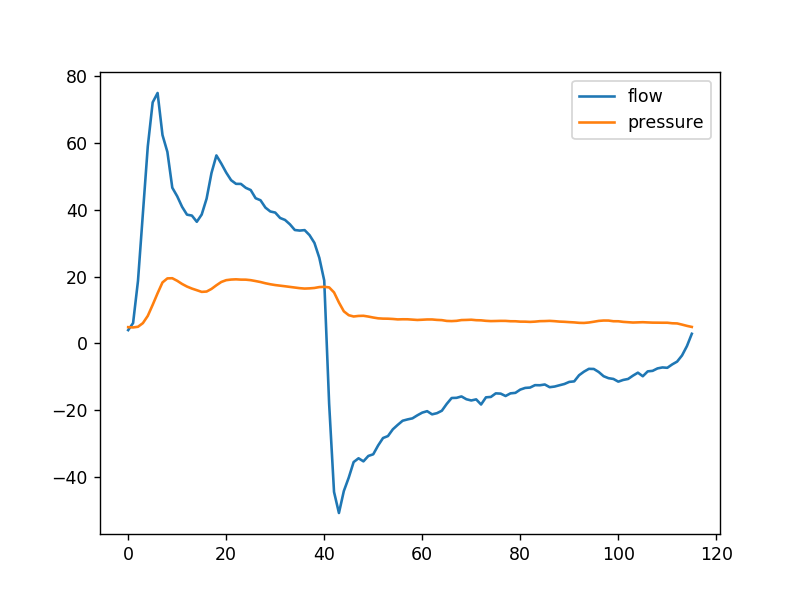

In [ ]:
import os 
from glob import glob

import matplotlib.pyplot as plt

data_files = glob(os.path.join('data', '*/*.csv'))
example_file = data_files[0]
breath_data = process_ventilator_data(example_file)
flow = breath_data[0]['flow']
pressure = breath_data[0]['pressure']
plt.plot(flow, label='flow')
plt.plot(pressure, label='pressure')
plt.legend()
plt.show()

## Lab Assignment \#1 

Now that we've visualized the data we need to featurize the data so we can use it in a ML algorithm. We'll need a bit more code to do this. We've already given you 8 features that you can use for the current models. Your assignment will be to process the rest of the features based on the requirements and notes that I've given in the code below.

In [ ]:
from glob import glob
import os

# import for Simpson's method. This will be helpful for calculating TVi
from scipy.integrate import simps


def extract_features_for_file(filename, existing_features):
    """
    Extract features for every single breath in file. To make matters a bit easier, we use
    existing features that we've already extracted from the file to help speed the process.
    """
    patient = filename.split('/')[-2]
    all_breath_data = process_ventilator_data(filename)
    all_features = []

    for breath_data in all_breath_data:
        breath_id = breath_data['breath_id']
        existing_breath_features = existing_features[existing_features.breath_id == breath_id].iloc[0]

        flow = breath_data['flow']
        pressure = breath_data['pressure']
        
        # inspiratory time (the amount of time a patient is inhaling for)
        i_time = existing_breath_features.i_time
        # exhaled tidal volume
        tve = existing_breath_features.tve
        # maximum flow for breath
        max_flow = existing_breath_features.max_flow
        # minimum flow for the breath
        min_flow = existing_breath_features.min_flow
        # maximum pressure for the breath
        max_pressure = existing_breath_features.max_pressure
        # The minimum pressure setting on the ventilator
        peep = existing_breath_features.peep
        # The area under the curve of the inspiratory pressure curve
        ip_auc = existing_breath_features.ip_auc
        # The area under the curve of the expiratory pressure curve
        ep_auc = existing_breath_features.ep_auc
        
        # This is the array index where the inhalation ends. We divide by 0.02 because
        # thats how frequently the ventilator samples data, every 0.02 seconds.
        x0_index = int(i_time / 0.02)
        
        
        '''
        Write your codes based on the instructions/hints below.
        # XXXXXXXX
        # XXXXXXXX
        # XXXXXXXX
        #
        '''
        #### Hints
        # Part of your assignment is to extract the following features for all breaths:
        #
        # Expiratory Time. The amount of time a patient is exhaling
        #e_time = XXX
        #
        # I:E ratio. The ratio of inspiratory to expiratory time. Measured by i_time/e_time
        #i_e_ratio = XXX
        #
        # Respiratory rate. The number of breaths a patient is breathing. This is measured by
        # 60 / (total breath time in seconds)
        #rr = XXX
        #
        # Tidal volume inhaled. The amount of air volume inhaled in the breath. 
        # Hint: use the simps function.
        # This will output volume in L/min, convert to ml/sec (* 1000 / 60)
        #tvi = XXX
        # 
        # Tidal volume ratio. Measured by tve/tvi
        #tve_tvi_ratio = XXX
        #
        # Minimum pressure of the breath
        #min_pressure = XXX
        #
        # PIP - peak inspiratory pressure. The peak pressure during inhalation
        #pip = XXX
        #
        # MAW - mean airway pressure for inhalation.
        #maw = XXX
        #
        # XXXXXXXX
        # XXXXXXXX
        # XXXXXXXX
        
        
        
        all_features.append([
            breath_id, i_time, e_time, i_e_ratio, rr, tvi, tve, tve_tvi_ratio,
            max_flow, min_flow, max_pressure, min_pressure, pip, maw, 
            peep, ip_auc, ep_auc, int(patient) 
        ])
    columns = [
        'breath_id', 'i_time', 'e_time', 'i_e_ratio', 'rr', 'tvi', 'tve',
        'tve_tvi_ratio', 'max_flow', 'min_flow', 'max_pressure',
        'min_pressure', 'pip', 'maw', 'peep', 'ip_auc', 'ep_auc', 'patient'
    ]
    return all_features, columns


def remake_dataset(dataset):
    data_files = glob(os.path.join('data', '*/*.csv'))
    
    patient_to_file_map = {}
    for filename in data_files:
        patient = filename.split('/')[-2]  # patient is embedded in this part of filename
        patient_to_file_map[patient] = filename

    data = []
    # iterate over all the unique patients in the train set
    for patient in dataset.patient.unique():
        existing_features = dataset[dataset.patient == patient]
        filename = patient_to_file_map[str(patient)]
        breath_data, columns = extract_features_for_file(filename, existing_features)
        # add breath rows
        data.extend(breath_data)
    # create new data frame with the new added information
    return pd.DataFrame(data, columns=columns)

In [ ]:
# remake train set
train_x = remake_dataset(train_x)
# remake validation set.
test_x = remake_dataset(test_x)

In [ ]:
train_x

,breath_id,i_time,tve,max_flow,min_flow,max_pressure,peep,ip_auc,ep_auc,patient
0,1,0.80,545.032222,51.06,-41.03,17.37,7.600,11.122367,16.057733,66
1,2,0.80,531.880278,53.13,-39.97,17.13,7.508,11.077750,17.310533,66
2,3,0.86,523.876667,52.86,-38.24,17.11,7.658,12.066000,16.697800,66
3,4,0.80,507.636111,51.04,-39.37,17.14,7.572,11.097800,15.774250,66
4,5,0.80,518.618889,47.88,-38.51,16.92,7.598,11.065400,18.483333,66
...,...,...,...,...,...,...,...,...,...,...
5970,296,0.90,355.365278,42.26,-51.51,23.53,13.194,19.216400,21.816367,662
5971,297,0.90,316.806944,42.10,-55.17,24.61,12.896,19.800467,21.739700,662
5972,298,0.92,395.971111,42.95,-22.47,21.35,13.090,16.997767,21.457600,662
5973,299,0.90,373.426389,40.34,-36.81,21.69,13.334,17.944000,21.798167,662


# Introduction to Scikit-Learn

### Create Ground Truth  (that the machine understands) 

In [ ]:
# Read the test dataset and set it up. Technically we're using the validation set.
test_y

,breath_id,patient,bsa,dta,cough,suction
0,20,292,1,0,0,0
1,21,292,1,0,0,0
2,22,292,0,0,0,0
3,23,292,1,0,0,0
4,24,292,1,0,0,0
...,...,...,...,...,...,...
1242,295,114,0,0,0,0
1243,296,114,0,0,0,0
1244,297,114,0,0,0,0
1245,298,114,0,0,0,0


What does this mean?

We have 6 columns here
 * *breath_id* - matches with a specific breath identifier from the raw data file.
 * *patient* - the patient the data came from
 * *bsa* - Breath Stacking Asynchrony. A single breath where the patient is trapping air in their chest
 * *dta* - Double Trigger Asynchrony. Two breaths in a row where the patient is trapping air
 * *cough* - What it sounds like, when a patient coughs
 * *suction* -  Nurses perform suction procedures to remove excess fluid from an endotracheal tube. This waveform is indicative of that. 
 
Now that we understand what our columns are, we need to put it into a format where the machine can understand it and create a learning model. Because this is a multiclass model, let's just have non-PVA breaths be class 0, breath stacking can be class 1, double trigger can be class 2.

In [ ]:
# Create a multi-class y vector that we can use for training purposes. 
train_y_vector = train_y.bsa * 1 + train_y.dta * 2
test_y_vector = test_y.bsa * 1 + test_y.dta * 2
test_y_vector

0       1
1       1
2       0
3       1
4       1
       ..
1242    0
1243    0
1244    0
1245    0
1246    0
Length: 1247, dtype: int64

In [ ]:
# See if there places where the data was mis-annotated, where both double trigger and breath stack was annotated.
# It's just good to know if this is happening or not so that we can either drop the data, or change it later on.
train_y_vector[train_y_vector > 2]

5438    3
5440    3
5521    3
dtype: int64

__Therefore, there are only three categories in our dataset.__

# Example: How to create and train a Random Forest Classifier

In [ ]:
'''
# Need to finalize dataset and remove misannotated examples first.
'''

# just drop places where data is double annotated. 
misannotated_train = train_y_vector > 2
misannotated_test = test_y_vector > 2

# ~ is the NOT operator
train_x = train_x.loc[~misannotated_train]
train_y_vector = train_y_vector.loc[~misannotated_train]

# do same thing for test 
test_x = test_x.loc[~misannotated_test]
test_y_vector = test_y_vector.loc[~misannotated_test]

In [ ]:
'''
Also make sure to drop data that is NaN. This is very important because otherwise your model won't train.
The .any(axis=1) function basically says, if there are any nans in this *ROW* then mark the row as true.
The .any(axis=0) would mark columns as True/False, but this isn't helpful now.
'''

nans_train = train_x.isna().any(axis=1)
nans_test = test_x.isna().any(axis=1)

# now filter them out of the dataset in the same way
train_x = train_x.loc[~nans_train]
train_y_vector = train_y_vector.loc[~nans_train]

test_x = test_x.loc[~nans_test]
test_y_vector = test_y_vector.loc[~nans_test]

In [ ]:
'''
any time we drop things from a data frame or series in pandas it is often helpful to re-index the object.
the index is usually a sequential ordering of the rows like 1, 2, ... n. Sometimes it can be different
but for now we'll just use sequential ordering
'''

train_x.index = range(len(train_x))
train_y_vector.index = range(len(train_y_vector))

test_x.index = range(len(test_x))
test_y_vector.index = range(len(test_y_vector))

__Now we can train the model.__

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# initialize model
model = RandomForestClassifier()

# don't use patient and breath_id columns
columns_to_use = list(set(train_x.columns).difference(['patient', 'breath_id']))

# fit the model to training 
model.fit(train_x[columns_to_use], train_y_vector)

# Now that the model is fitted, evaluate how well it is performing
predictions = model.predict(test_x[columns_to_use])


'''
I added a model optimization for free here. I re-modeled the data in the train set slightly so that the first double  
trigger breath in training set is marked as a breath stack, and kept last double trigger breath a double trigger. 
The thing about this is that we need to change the breath before a double trigger in our predictions to a
double trigger to ensure we are being consistent with our predictions.

You can remove this optimization but your double trigger performance will be worse because the classifier 
can get confused between determining what is double trigger, and what is breath stack.
'''

for idx, pred in enumerate(predictions):
    if pred == 2:
        predictions[idx-1] = 2

In [ ]:
'''
Now evaluate how well our model is doing. This module, sklearn.metrics is actually very helpful from a general ML
standpoint because pytorch doesn't incorporate a metrics module. Most people just use scikit-learn here. The 
classification_report function is capable of outputting multi-class statistics for precision, recall, and f1 score
which makes it a handy function if you want to quickly gauge model performance.
'''

from sklearn.metrics import classification_report

print(classification_report(test_y_vector, predictions))

              precision    recall  f1-score   support

           0       0.84      0.75      0.79       842
           1       0.48      0.76      0.59       301
           2       0.63      0.12      0.20       104

    accuracy                           0.70      1247
   macro avg       0.65      0.54      0.53      1247
weighted avg       0.73      0.70      0.69      1247



## Lab Assignment \#2 Create a working model of a random forest classifier with all the features given. 

Basically as the headline says. If you've been able to featurize all your information correctly, then move onto creating a random forest model for the completely featurized dataset. Run your model 10 times to get performance scores for precision, recall, and f1-score. Average the results. 

# Lab Assignment \#3 Comparison of Surpervised ML algorithms

Much of machine learning hype focuses on which algorithm was used for a problem, so why haven't I made this more prominent of an item? The reason is because often using a different algorithm doesn't always help a machine learning problem and can often add additional hassles where you were trying to help matters. That said, it is helpful to do your due dilligence and try all the possible algorithms that fit your problem.

__In this assignment, you are free to implement at least *one* Supervised Learning model and to compare it/them with the Random Forest model (please report the misclassification rate, precision, recall, F1-score etc for the comparsion).__

__Here are several other supervised learning algorithms that can be used:__
 * Neural Networks (feel free to use Pytorch/Tensorflow if you really like it)
 * Logistic Regression
 * Naive Bayes
 * SVM (Typically SVM is used for binary classification, you may explore it for multi-classification.)
 * etc.


 Hints: 
### Logistic Regression 

Now we’ll run L1-regularized logistic regression on our dataset.
You may use:
```python
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
```
* Fit a L1-regularized logistic regression model by letting python chose the regularization
parameter itself.

Hint:
```python
model = LogisticRegression(penalty='l1') # L1-regularized
```

### kNN Classifier

Use kNN classifier model on our dataset. 

```python
from sklearn.neighbors import KNeighborsClassifier
```



# Lab Assignment \#4 Clustering, Unsupervised Learning

__From above, we have known there are only 3 classes in our labels as shown below.__

In [ ]:
test_y

,breath_id,patient,bsa,dta,cough,suction
0,20,292,1,0,0,0
1,21,292,1,0,0,0
2,22,292,0,0,0,0
3,23,292,1,0,0,0
4,24,292,1,0,0,0
...,...,...,...,...,...,...
1242,295,114,0,0,0,0
1243,296,114,0,0,0,0
1244,297,114,0,0,0,0
1245,298,114,0,0,0,0


__What does this mean?__

We have 6 columns here
 * *breath_id* - matches with a specific breath identifier from the raw data file.
 * *patient* - the patient the data came from
 * *bsa* - Breath Stacking Asynchrony. A single breath where the patient is trapping air in their chest
 * *dta* - Double Trigger Asynchrony. Two breaths in a row where the patient is trapping air
 * *cough* - What it sounds like, when a patient coughs
 * *suction* -  Nurses perform suction procedures to remove excess fluid from an endotracheal tube. This waveform is indicative of that. 
 
Now that we understand what our columns are, we need to put it into a format where the machine can understand it and create a learning model. Because this is a multiclass model, let's just have __non-PVA breaths be class 0, breath stacking can be class 1, double trigger can be class 2__.


### PCA
This method utilizes the [principal component analysis algorithm](https://en.wikipedia.org/wiki/Principal_component_analysis) to transform your dataset and generate new features that are independent of each other. The user gets to choose the number of features that are generated, and often modelers choose to generate an increasing number of features, and then train a new model for each PCA run while determining the performance of each model.

Pros:
 * Dimensionality reduction will cause models to train faster
 * Generated features are linearly uncorrelated with each other
 * Easy to utilize because there are multiple existing functions for this, like in [sckit-learn.](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)
 
Cons:
 * Loss of information in your data will likely occur and may cause performance degradation
 * Human comprehension of features is lost when PCA is performed

### Perform:
__(i) PCA and (ii) kernel PCA, with number of components being set as 3 (we have only 3 classes here). Note that, you might have to set other parameters as well for some of the above methods – you are welcome to explore different options. Produce the best figure (for each of the above method) that identifies the cluster structure (if it can) after dimension reduction.__

Feel free to use [sklearn](https://scikit-learn.org/stable/modules/classes.html).

Hints:
```python
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
```

Make sure that you understand the purpose of each parameter in PCA and kernelPCA (which kernels will you use), and find out the best best figure you can produce. Report the remaining features after PCA.

In [ ]:
## write your codes

### Perform:
__k-means clustering__

Use k-Means clustering, you are free to select the features.
Is the cluster assignment you obtained, consistent with the true rating of each document?

Hints:

* ```python
from sklearn.cluster import KMeans
```

* Use [confusion matrix](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.coo_matrix.html) to measure the performance of clustering.


In [ ]:
## write your codes